# Jitter vs MOS

## A correlation matrix of various jitter and MOS parameters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Definitions

In [2]:
DATA_PATH = ('pims_cloudpbx_subset_201806051550_1million.csv')
DESCRIBED_COLUMNS = ["calldate", "callend", "duration", "connect_duration", "progress_time", 
                     "first_rtp_time", "caller", "caller_domain", "caller_reverse", "callername", 
                     "callername_reverse", "called", "called_domain", "called_reverse", "sipcallerip", 
                     "sipcallerport", "sipcalledip", "sipcalledport", "whohanged", "lastSIPresponse_id", 
                     "dscp", "a_payload", "b_payload", "a_saddr", "b_saddr", "a_received", "b_received", 
                     "a_lost", "b_lost", "a_ua_id", "b_ua_id", "a_avgjitter_mult10", "b_avgjitter_mult10",
                     "a_maxjitter", "b_maxjitter", "a_sl1", "a_sl2", "a_sl3", "a_sl4", "a_sl5", "a_sl6", 
                     "a_sl7", "a_sl8", "a_sl9", "a_sl10", "a_d50", "a_d70", "a_d90", "a_d120", "a_d150", 
                     "a_d200", "a_d300", "b_sl1", "b_sl2", "b_sl3", "b_sl4", "b_sl5", "b_sl6", "b_sl7", 
                     "b_sl8", "b_sl9", "b_sl10", "b_d50", "b_d70", "b_d90", "b_d120", "b_d150", "b_d200", 
                     "b_d300", "a_mos_f1_mult10", "a_mos_f2_mult10", "a_mos_adapt_mult10", 
                     "b_mos_f1_mult10", "b_mos_f2_mult10", "b_mos_adapt_mult10", "a_rtcp_loss", 
                     "a_rtcp_maxfr", "a_rtcp_avgfr_mult10", "a_rtcp_maxjitter", "a_rtcp_avgjitter_mult10", 
                     "b_rtcp_loss", "b_rtcp_maxfr", "b_rtcp_avgfr_mult10", "b_rtcp_maxjitter", 
                     "b_rtcp_avgjitter_mult10", "packet_loss_perc_mult1000", "a_packet_loss_perc_mult1000", 
                     "b_packet_loss_perc_mult1000", "delay_sum", "a_delay_sum", "b_delay_sum", 
                     "a_rtp_ptime", "b_rtp_ptime"]

df = pd.read_csv(DATA_PATH,delim_whitespace=True,low_memory=False)

## Preview

In [3]:
df.head()

,,ID,calldate,callend,duration,connect_duration,progress_time,first_rtp_time,caller,caller_domain,caller_reverse,...,response_time_xxx,a_mos_f1_min_mult10,a_mos_f2_min_mult10,a_mos_adapt_min_mult10,b_mos_f1_min_mult10,b_mos_f2_min_mult10,b_mos_adapt_min_mult10,a_rtp_ptime,b_rtp_ptime,flags
71483861,2018-03-15,21:55:32,2018-03-15,22:32:36,2224,2215,3,9,604862xxxx,192.102.254.75,SANITIZED,...,3267,43,43,43,38,38,38,20,20,NaN
71483875,2018-03-15,21:33:00,2018-03-15,22:10:04,2224,2215,3,9,604862xxxx,192.102.254.75,SANITIZED,...,3268,45,45,45,38,38,38,20,20,NaN
70783533,2018-03-09,22:14:22,2018-03-09,22:32:37,1095,1084,0,11,604596xxxx,192.102.254.75,SANITIZED,...,444,45,45,45,41,45,40,20,20,NaN
70783546,2018-03-09,21:51:51,2018-03-09,22:10:06,1095,1084,0,11,604596xxxx,192.102.254.75,SANITIZED,...,444,45,45,45,41,45,40,20,20,NaN
76384583,2018-05-03,10:31:10,2018-05-03,10:31:15,5,5,0,0,1709739xxxx,98.159.46.82,SANITIZED,...,92,45,45,45,45,45,45,20,20,NaN


In [4]:
## Filter out data with MOS=0.

df_filtered=df[df['b_mos_adapt_mult10']>0]
df_filtered=df_filtered[df_filtered['connect_duration']>0]

In [5]:
corr=df_filtered[['a_rtcp_avgjitter_mult10','a_mos_f1_mult10','a_mos_f2_mult10','a_mos_adapt_mult10','a_avgjitter_mult10','a_maxjitter','b_rtcp_avgjitter_mult10','b_mos_f1_mult10','b_mos_f2_mult10','b_mos_adapt_mult10','b_avgjitter_mult10','b_maxjitter']].corr()

In [6]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

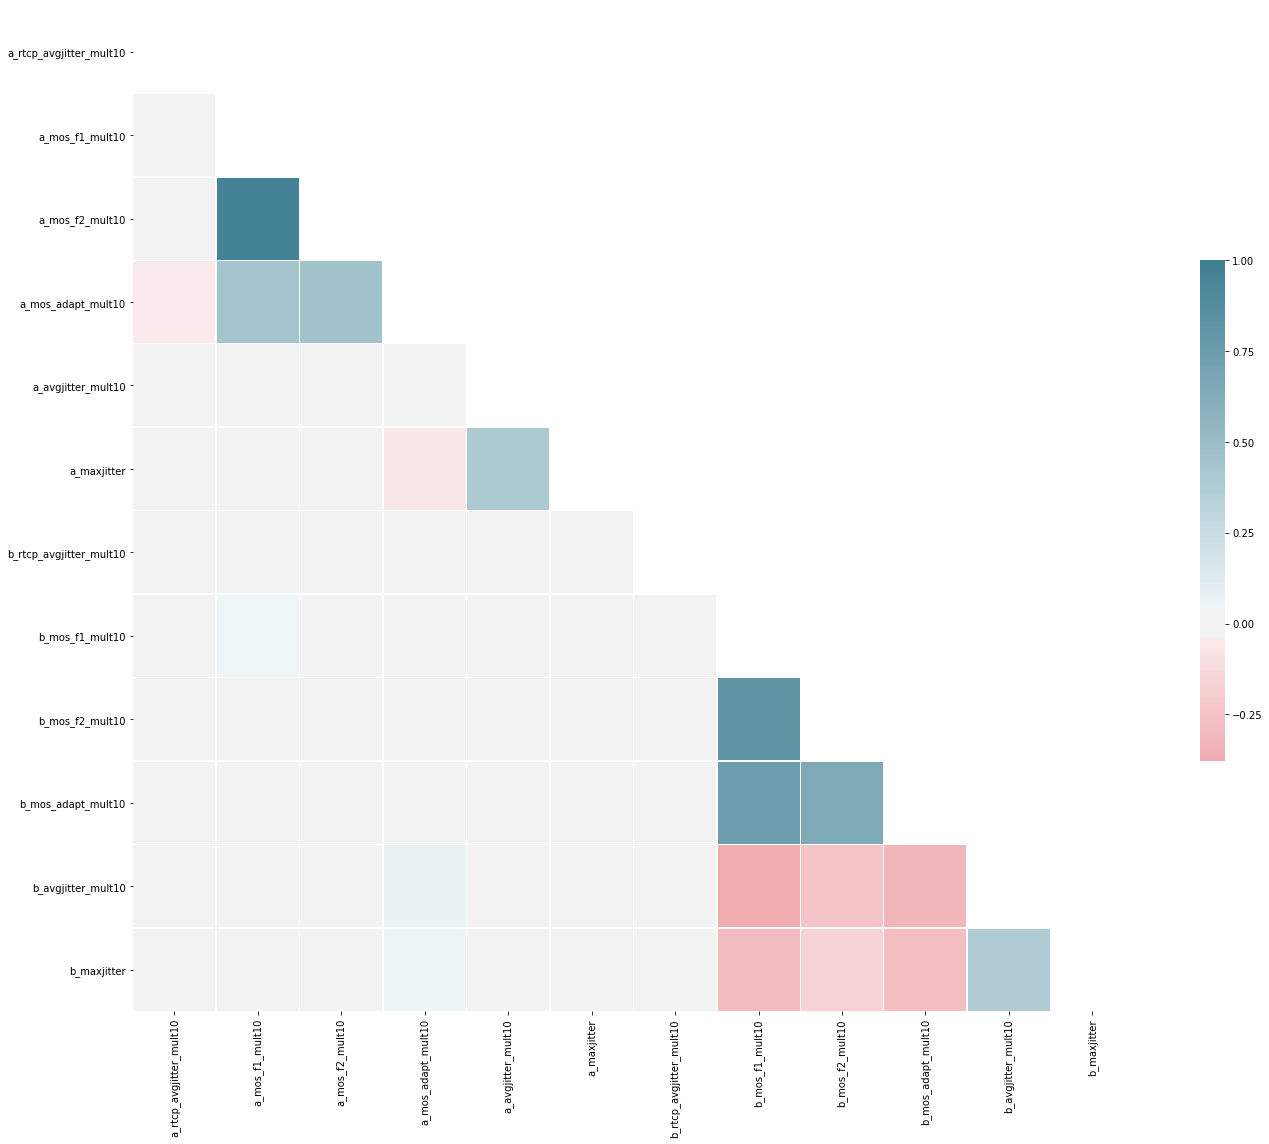

In [7]:
# Filter calls with duration 0


plt.rcParams['axes.labelsize'] = 10
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
plt.tight_layout()
plt.savefig('./img/jitter_vs_mos_gt0_1million.png', dpi=300)

In [8]:
df_filtered=df_filtered[df_filtered['b_mos_adapt_mult10']<40]
len(df_filtered)

6074

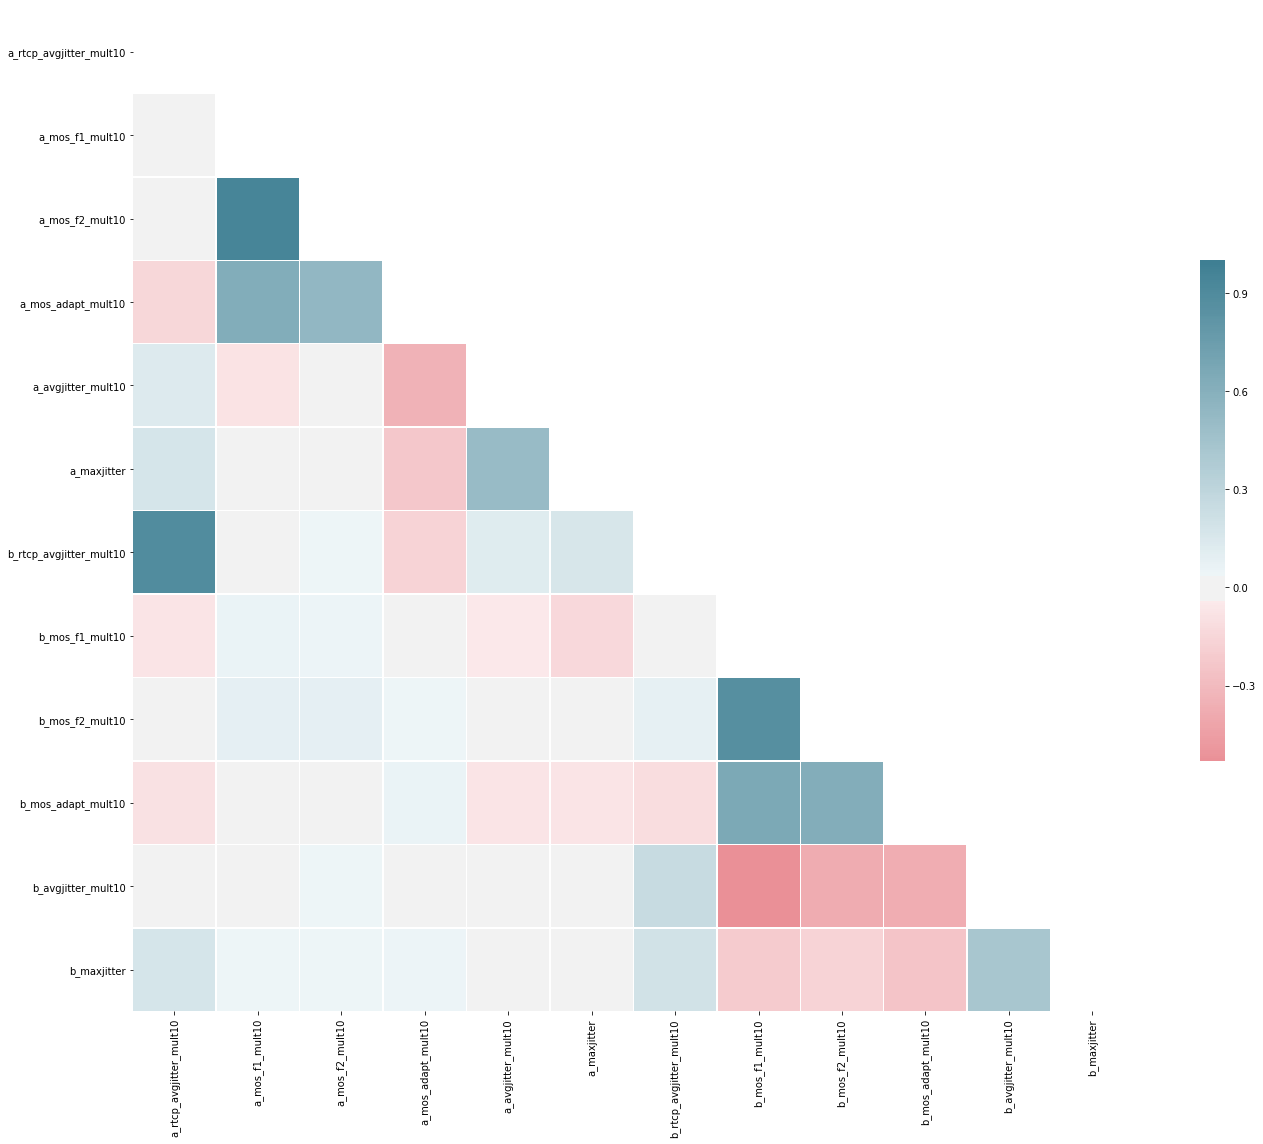

In [9]:
corr=df_filtered[['a_rtcp_avgjitter_mult10','a_mos_f1_mult10','a_mos_f2_mult10','a_mos_adapt_mult10','a_avgjitter_mult10','a_maxjitter','b_rtcp_avgjitter_mult10','b_mos_f1_mult10','b_mos_f2_mult10','b_mos_adapt_mult10','b_avgjitter_mult10','b_maxjitter']].corr()

# Filter calls with duration 0


plt.rcParams['axes.labelsize'] = 10
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
plt.tight_layout()
plt.savefig('./img/jitter_vs_mos_gt0lt40_1million.png', dpi=300)